In [1]:
import sys

sys.path

sys.path.append("/Users/hbuhrmann/PycharmProjects/CycleStats")

In [2]:
import sourcetocsv as cycle

In [52]:
#filepath = 'C:\\Users\\hanne\\PycharmProjects\\CycleStats\\TestResults\\'


filepath = '/Users/hbuhrmann/PycharmProjects/CycleStats/TestResults2/'
filename= 'richmondpark_final.csv'

cycledf=cycle.getfinalcsvcycledata(filepath,filename)


In [4]:
import thinkstats2
import thinkplot
import numpy as np

In [58]:
query = 'LatitudeDegrees >= 51.421213 & LatitudeDegrees <= 51.456435 '
query += '& LongitudeDegrees >= -0.308058 & LongitudeDegrees <= -0.252830 '
query += '& Speedmps2 > 0 & DistXY2 > 0'
richmonddf = cycledf.query(query)

print(f'cycle sample count = {len(cycledf)} and richmond sample count = {len(richmonddf)}')


cycle sample count = 208248 and richmond sample count = 77866


# HexBin Plot : Gradient Vs Speed
Using datapoints that are at least 10 seconds away from a gradient type inflection (e.g. descend to level or descend to climb)

Num rows in tempdf 3507


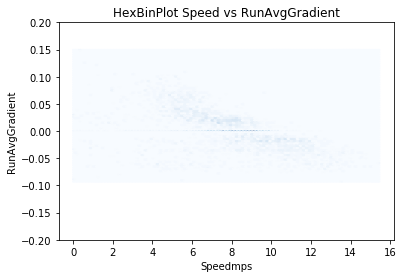

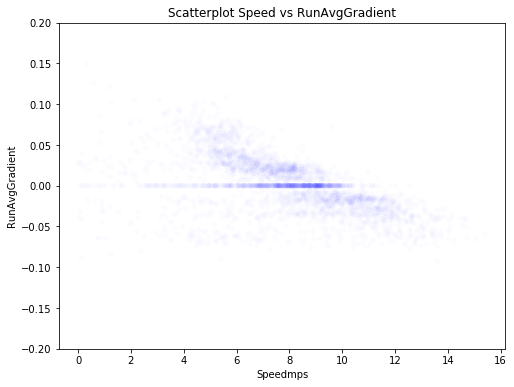

3 From -0.1 to -0.075 has 9 data points
4 From -0.075 to -0.05 has 224 data points
5 From -0.05 to -0.025 has 483 data points
6 From -0.025 to -0.0 has 599 data points
7 From -0.0 to 0.025 has 1458 data points
8 From 0.025 to 0.05 has 449 data points
9 From 0.05 to 0.075 has 220 data points
10 From 0.075 to 0.1 has 54 data points
11 From 0.1 to 0.125 has 9 data points
12 From 0.125 to 0.15 has 2 data points


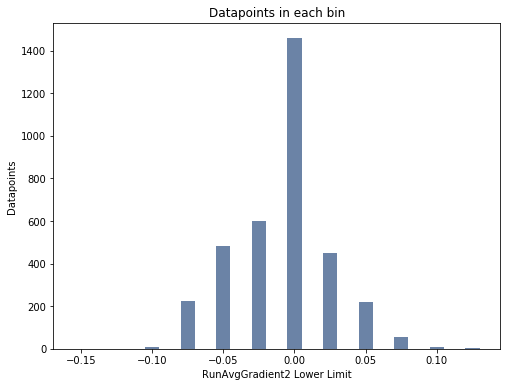

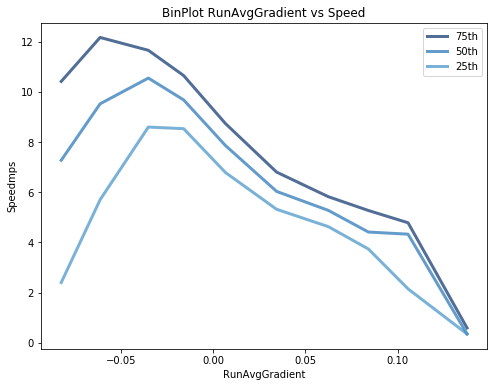

<Figure size 576x432 with 0 Axes>

In [201]:
query = 'RunDur2 >=30000 &  RunEnd2 == True '
query += '& RunAvgGradient2 >= -0.15 & RunAvgGradient2 <= 0.15'

tempdf = richmonddf.query(query)

print(f'Num rows in tempdf {len(tempdf)}')

thinkplot.HexBin(tempdf.Speedmps2,tempdf.RunAvgGradient2)
thinkplot.Config(ylim=(-0.2,0.2),ylabel = 'RunAvgGradient',xlabel='Speedmps',title='HexBinPlot Speed vs RunAvgGradient')
thinkplot.Show()

thinkplot.Scatter(tempdf.Speedmps2,tempdf.RunAvgGradient2,alpha=0.01)
thinkplot.Config(ylim=(-0.2,0.2),ylabel = 'RunAvgGradient',xlabel='Speedmps',title='Scatterplot Speed vs RunAvgGradient')
thinkplot.Show()

binstart = -0.15
binend = 0.15
binincrement = 0.025

bins = np.arange(binstart,binend,binincrement)

indices = np.digitize(tempdf.RunAvgGradient2,bins)
groups = tempdf.groupby(indices)

firstbin = len(bins)
lastbin = 1
for i,group in groups:
    if firstbin > i:
        firstbin = i
    if lastbin < i:
        lastbin = i
    print(f'{i} From {round(bins[i-1],3)} to {round(bins[i-1]+binincrement,3)} has {len(group)} data points')
    bincounts[i-1] = len(group)
    
for i in range(0,firstbin-1):
    bincounts[i] = 0

for i in range(lastbin,len(bins)):
    bincounts[i]=0
    
thinkplot.Bar(bins,ys=bincounts,width=0.01)
thinkplot.Config(xlabel='RunAvgGradient2 Lower Limit',ylabel='Datapoints',title='Datapoints in each bin')
thinkplot.Show()

RunAvgGradients = [group.RunAvgGradient2.mean() for i,group in groups]
speedcdfs = [thinkstats2.Cdf(group.Speedmps2) for i,group in groups]

percent = [75,50,25]

for perc in percent:
    speeds = [cdf.Percentile(perc) for cdf in speedcdfs]
    label = '%dth' % perc
    thinkplot.Plot(RunAvgGradients,speeds,label=label)

thinkplot.Config(xlabel='RunAvgGradient',ylabel='Speedmps',title='BinPlot RunAvgGradient vs Speed')    
thinkplot.Show()

# Lets see if this looks the same for the east sussex data set

In [140]:
#filepath = 'C:\\Users\\hanne\\PycharmProjects\\CycleStats\\TestResults\\'


filepath = '/Users/hbuhrmann/PycharmProjects/CycleStats/TestResults2/'
filename= 'eastsussex_final.csv'

eastsussexdf=cycle.getfinalcsvcycledata(filepath,filename)

query = 'Speedmps2 > 0 & DistXY2 > 0 & Speedmps2 < 21'
esdf = eastsussexdf.query(query)

print(f'East Sussex count = {len(eastsussexdf)} and without zero distance points = {len(esdf)}')



East Sussex count = 397164 and without zero distance points = 395821


Num rows in tempdf 16378


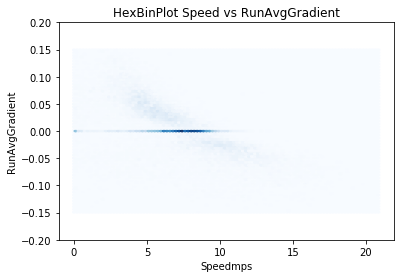

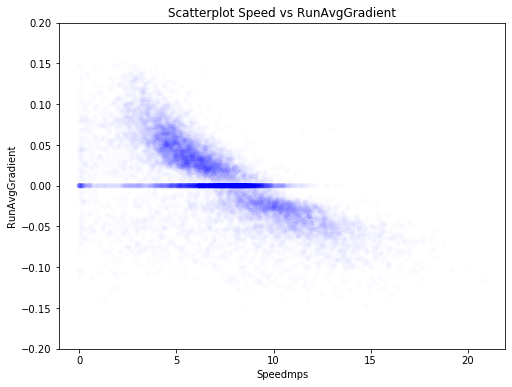

1 From -0.15 to -0.125 has 23 data points
2 From -0.125 to -0.1 has 129 data points
3 From -0.1 to -0.075 has 462 data points
4 From -0.075 to -0.05 has 1208 data points
5 From -0.05 to -0.025 has 2168 data points
6 From -0.025 to -0.0 has 1501 data points
7 From -0.0 to 0.025 has 5475 data points
8 From 0.025 to 0.05 has 2655 data points
9 From 0.05 to 0.075 has 1653 data points
10 From 0.075 to 0.1 has 758 data points
11 From 0.1 to 0.125 has 251 data points
12 From 0.125 to 0.15 has 95 data points


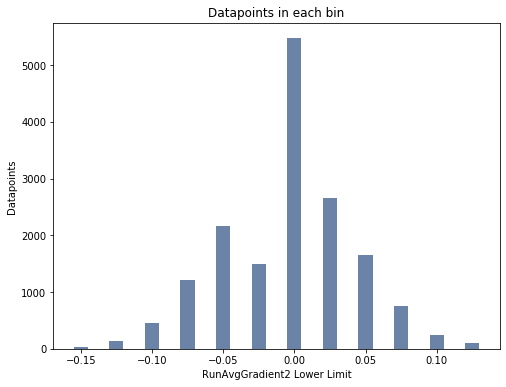

75th Percentile : 
Gradient : -0.133,  Speed : 53.6km/h
Gradient : -0.111,  Speed : 46.9km/h
Gradient : -0.086,  Speed : 50.2km/h
Gradient : -0.06,  Speed : 47.1km/h
Gradient : -0.036,  Speed : 41.8km/h
Gradient : -0.016,  Speed : 35.7km/h
Gradient : 0.005,  Speed : 29.4km/h
Gradient : 0.037,  Speed : 22.7km/h
Gradient : 0.061,  Speed : 18.3km/h
Gradient : 0.086,  Speed : 15.9km/h
Gradient : 0.11,  Speed : 13.5km/h
Gradient : 0.134,  Speed : 11.8km/h
50th Percentile : 
Gradient : -0.133,  Speed : 42.4km/h
Gradient : -0.111,  Speed : 37.2km/h
Gradient : -0.086,  Speed : 42.9km/h
Gradient : -0.06,  Speed : 40.9km/h
Gradient : -0.036,  Speed : 37.6km/h
Gradient : -0.016,  Speed : 32.4km/h
Gradient : 0.005,  Speed : 25.6km/h
Gradient : 0.037,  Speed : 19.9km/h
Gradient : 0.061,  Speed : 16.2km/h
Gradient : 0.086,  Speed : 13.2km/h
Gradient : 0.11,  Speed : 11.8km/h
Gradient : 0.134,  Speed : 10.4km/h
25th Percentile : 
Gradient : -0.133,  Speed : 29.5km/h
Gradient : -0.111,  Speed : 30.1km

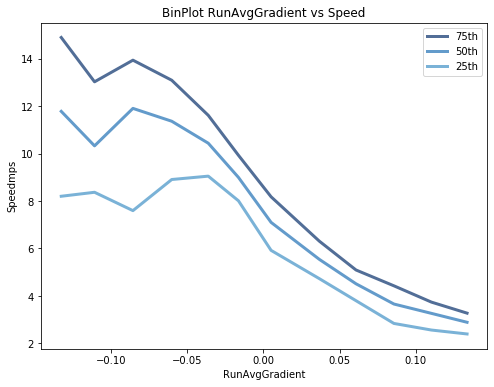

<Figure size 576x432 with 0 Axes>

In [211]:
query = 'RunDur2 >=30000 &  RunEnd2 == True '
query += '& RunAvgGradient2 >= -0.15 & RunAvgGradient2 <= 0.15'

tempdf = esdf.query(query)

print(f'Num rows in tempdf {len(tempdf)}')

thinkplot.HexBin(tempdf.Speedmps2,tempdf.RunAvgGradient2)
thinkplot.Config(ylim=(-0.2,0.2),ylabel = 'RunAvgGradient',xlabel='Speedmps',title='HexBinPlot Speed vs RunAvgGradient')
thinkplot.Show()

thinkplot.Scatter(tempdf.Speedmps2,tempdf.RunAvgGradient2,alpha=0.01)
thinkplot.Config(ylim=(-0.2,0.2),ylabel = 'RunAvgGradient',xlabel='Speedmps',title='Scatterplot Speed vs RunAvgGradient')
thinkplot.Show()

binstart = -0.15
binend = 0.15
binincrement = 0.025

bins = np.arange(binstart,binend,binincrement)

indices = np.digitize(tempdf.RunAvgGradient2,bins)
groups = tempdf.groupby(indices)

firstbin = len(bins)
lastbin = 1
for i,group in groups:
    if firstbin > i:
        firstbin = i
    if lastbin < i:
        lastbin = i
    print(f'{i} From {round(bins[i-1],3)} to {round(bins[i-1]+binincrement,3)} has {len(group)} data points')
    bincounts[i-1] = len(group)
    
for i in range(0,firstbin-1):
    bincounts[i] = 0

for i in range(lastbin,len(bins)):
    bincounts[i]=0
     
thinkplot.Bar(bins,ys=bincounts,width=0.01)
thinkplot.Config(xlabel='RunAvgGradient2 Lower Limit',ylabel='Datapoints',title='Datapoints in each bin')
thinkplot.Show()

RunAvgGradients = [group.RunAvgGradient2.mean() for i,group in groups]
speedcdfs = [thinkstats2.Cdf(group.Speedmps2) for i,group in groups]

percent = [75,50,25]

for perc in percent:
    speeds = [cdf.Percentile(perc) for cdf in speedcdfs]
    label = '%dth' % perc
    thinkplot.Plot(RunAvgGradients,speeds,label=label)
    print(f'{perc}th Percentile : ')
    for i in range (0,len(speeds)):
        print(f'Gradient : {round(RunAvgGradients[i],3)},  Speed : {round(speeds[i]*3.6,1)}km/h')

thinkplot.Config(xlabel='RunAvgGradient',ylabel='Speedmps',title='BinPlot RunAvgGradient vs Speed')    
thinkplot.Show()

In [163]:
for i, group in groups :
    print (i-1, round(bins[i-1],3),len(group))

0 -0.15 688
1 -0.125 1451
2 -0.1 2544
3 -0.075 4247
4 -0.05 4534
5 -0.025 2922
6 -0.0 18795
7 0.025 10679
8 0.05 9998
9 0.075 8875
10 0.1 7105
11 0.125 4765


In [178]:
tempdf.columns


Index(['Unnamed: 0', 'RowId', 'ActivityId', 'Time', 'LatitudeDegrees',
       'LongitudeDegrees', 'DistanceMeters', 'AltitudeMeters', 'Speed',
       'Heartrate', 'Cadence', 'FileType', 'Watts', 'LatitudeRad',
       'LongitudeRad', 'PrevLong', 'Duration', 'ElapasedDuration', 'Elevation',
       'VerticalClimb', 'VerticalFall', 'DistXY', 'DistXYZ', 'Direction',
       'Gradient', 'Speedmps', 'DistXYZ2', 'DistXY2', 'Duration2', 'Speedmps2',
       'Cadence2', 'HeartRate2', 'Watts2', 'Elevation2', 'Gradient2',
       'VerticalClimb2', 'VerticalFall2', 'Direction2', 'IncludeIn2',
       'RunStart2', 'RunType2', 'RunEnd2', 'RunDistXY2', 'RunDistXYZ2',
       'RunElevation2', 'RunAvgGradient2', 'RunDur2', 'RunAvgSpeed2',
       'RunAvgCadence2'],
      dtype='object')